
<ul>1 We're going to classify visualize the distribution </ul> 
<ul>2 Look at the length of spam vs the length of ham messages</ul>
<ul>3 Group to see the top 10 most sent messages </ul>
<ul>4 We'll extract the various most common spam words</ul>
<ul>5 The preprocessing</ul>
<ul>6 The modelling process</ul>  

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [104]:
data = pd.read_csv('/Users/mac/Downloads/spam.csv', encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [105]:
data = data.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [106]:
data.columns = ['Label','Text']

In [107]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


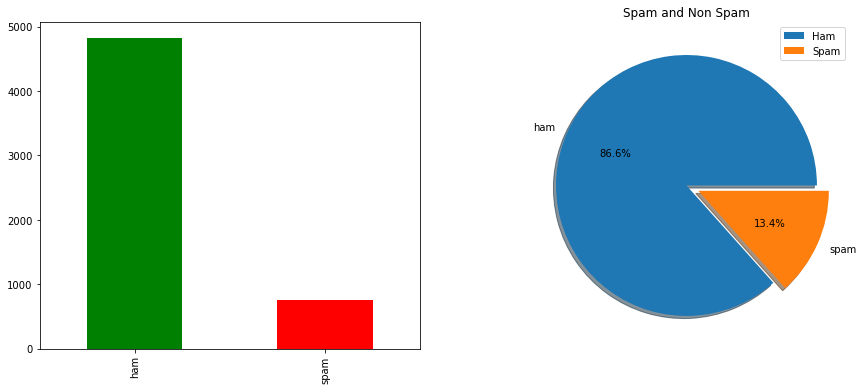

In [108]:
#Let's check the distribution 
fig,axs = plt.subplots(1,2, figsize = (15,6))
data.Label.value_counts().plot(kind='pie',ax=axs[1],autopct='%1.1f%%', explode=[0,0.1],shadow=True)
data.Label.value_counts().plot(kind='bar', ax=axs[0], color=['g','r'])
plt.title('Spam and Non Spam')
plt.ylabel('')
plt.legend(['Ham','Spam'])
plt.show()

<b>Intuition</b><br>
As expected most of the data present aren't spam messages 

#### Let's see look into length of spam vs non spam messages, to satisfy a stereotype that spam messages are long.

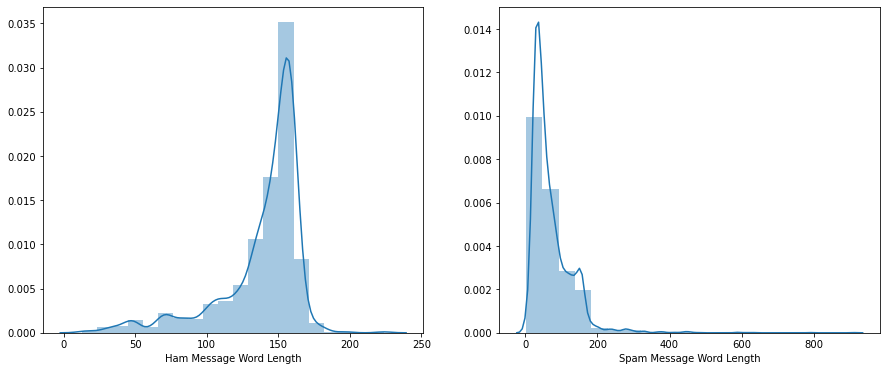

In [109]:
data['TextLength'] = data.Text.apply(len)

fig, axs = plt.subplots(1,2, figsize=(15,6))

sns.distplot(data[data.Label=='spam']['TextLength'], bins = 20,ax=axs[0])
axs[0].set_xlabel("Ham Message Word Length")


sns.distplot(data[data.Label =='ham']['TextLength'], bins = 20, ax=axs[1])
axs[1].set_xlabel("Spam Message Word Length")

plt.show()
                 

<b>Intuition</b><br>
Apparently spam messages are always very long. In this case our assumption proved accurate 

In [110]:
data.head()

,Label,Text,TextLength
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#### Let's take a look at the most commonly sent messages 

In [111]:
Most_sent = data.groupby('Text')['Label'].agg([len,np.max]).sort_values(by='len',ascending=True)
Most_sent.head(10)

,len,amax
Text,,
&lt;#&gt; in mca. But not conform.,1,ham
"Right on brah, see you later",1,ham
Right it wasnt you who phoned it was someone with a number like yours!,1,ham
Reply with your name and address and YOU WILL RECEIVE BY POST a weeks completely free accommodation at various global locations www.phb1.com ph:08700435505150p,1,spam
Reply to win å£100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service,1,spam
Reply to win å£100 weekly! What professional sport does Tiger Woods play? Send STOP to 87239 to end service,1,spam
Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.,1,spam
Remind me how to get there and I shall do so,1,ham
Remember to ask alex about his pizza,1,ham


#### It will be nice to sort out some spam words and have a feel

In [112]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [113]:
spam_messages = data[data["Label"] == "spam"]["Text"]
ham_messages = data[data["Label"] == "ham"]["Text"]

spam_words = []
ham_words = []
 

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: Text, Length: 4825, dtype: object

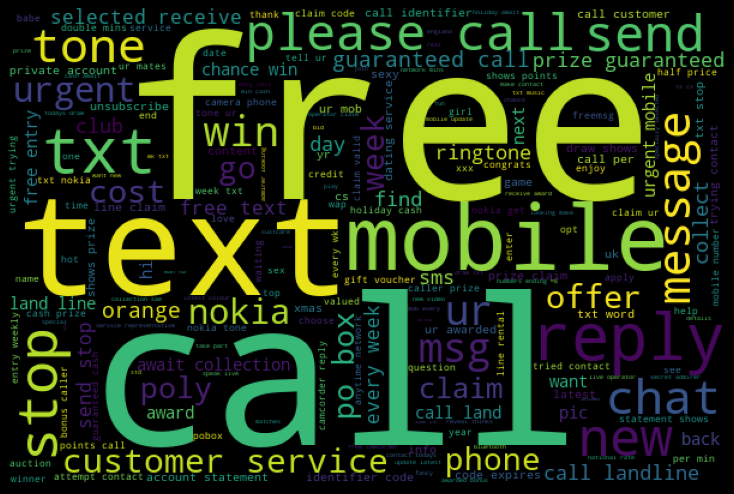

In [114]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### The preprocessing steps of stemming, stopword/punctuation removal

In [115]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [116]:

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [lemmatizer.lemmatize(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

data["Text"] = data["Text"].apply(cleanText)
data.head(10)  


,Label,Text,TextLength
0,ham,Go jurong point crazy Available bugis n great ...,111
1,ham,Ok lar Joking wif u oni,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,ham,U dun say early hor U c already say,49
4,ham,Nah dont think go usf life around though,61
5,spam,FreeMsg Hey darling 3 week word back Id like f...,148
6,ham,Even brother like speak treat like aid patent,77
7,ham,per request Melle Melle Oru Minnaminunginte Nu...,160
8,spam,WINNER valued network customer selected receiv...,158
9,spam,mobile 11 month U R entitled Update latest col...,154


<b> Performed the lemmatization process and it looks worse, i'll rather use the text as it is for the model</b><br>
Let's build a Naive Bayes Classifier and see how it performs 


In [117]:
# Let's create a column with an encoded format for the Target
data['Spam'] = data['Label'].map({'ham': 0, 'spam': 1})
Y = data['Spam'].values

<b>We're going to use both CountVectorizer and TFidf vectorizer to calculate the features</b>

In [118]:
df_train, df_test, Ytrain, Ytest = train_test_split(data['Text'], Y, test_size=0.33)

In [119]:
tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(df_train)
Xtest = tfidf.transform(df_test)

In [120]:
from sklearn.naive_bayes import MultinomialNB

In [121]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# exit()

train score: 0.9774979908920439
test score: 0.957041870581838


<b>Case II</b>

In [122]:
count_vectorizer = CountVectorizer(decode_error='ignore')
Xtrain = count_vectorizer.fit_transform(df_train)
Xtest = count_vectorizer.transform(df_test)

In [123]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# exit()

train score: 0.9922314492365389
test score: 0.9836867862969005


In [124]:
# What did we miss?
X = tfidf.transform(data['Text'])
data['predictions'] = model.predict(X)

In [126]:
Wrongly_classified = data[(data['predictions'] == 0) & (data['Spam'] == 1)]['Text']
for msg in Wrongly_classified:
    print(msg)

SMS ac Sptv New Jersey Devils Detroit Red Wings play Ice Hockey Correct Incorrect End Reply END SPTV
hear new Divorce Barbie come Kens stuff
SMS ac sun0819 post HELLOYou seem cool
Hi Im sue 20 year old work lapdancer love sex Text live Im bedroom text SUE 89555 TextOperator G2 1DA 150ppmsg 18
realize 40 year well thousand old lady running around tattoo
Ever thought living good life perfect partner txt back NAME AGE join mobile community 100pSMS
Talk sexy Make new friend fall love world discreet text dating service text VIP 83110 see could meet
getting touch folk waiting company txt back NAME AGE opt Enjoy community 150pSMS
Filthy story GIRLS waiting
Dont forget place many FREE Requests 1stchoicecouk wish Information call 08707808226
sale arsenal dartboard Good condition double treble
0ANETWORKS allow company bill SMS responsible supplier
FreeMsgFeelin kinda lnly hope u like 2 keep company Jst got cam moby wanna c picTxt reply DATE 82242 Msg150p 2rcv Hlp 08712317606 stop 82242
TheMobYo 

In [127]:
# things that should not be spam
not_actually_spam = data[(data['predictions'] == 1) & (data['Spam'] == 0)]['Text']
for msg in not_actually_spam:
  print(msg)

free nowcan call
Nokia phone lovly
